#### Teste de Hipóteses em Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##### Teste Qui-dradado para associações de variáveis categóricas

In [2]:
!pip install tabulate


[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
from tabulate import tabulate

t = [['Male', 'Car'],
     ['Male', 'Car'],
     ['Male', 'Motocycle'],
     ['Female', 'Car'],
     ['Female', 'Bike']]

print (tabulate(t, headers=['Gender', 'Vehicle'], tablefmt='fancy_grid', stralign='center', numalign='center', floatfmt='.2f'))

╒══════════╤═══════════╕
│  Gender  │  Vehicle  │
╞══════════╪═══════════╡
│   Male   │    Car    │
├──────────┼───────────┤
│   Male   │    Car    │
├──────────┼───────────┤
│   Male   │ Motocycle │
├──────────┼───────────┤
│  Female  │    Car    │
├──────────┼───────────┤
│  Female  │   Bike    │
╘══════════╧═══════════╛


##### 1. Criando a tabela de contingência

In [4]:
print(tabulate([['Male', 9,18,28],
                ['Female', 5, 8, 15]],
                headers=['Car', 'Motorcycle', 'Bike'],
                tablefmt='fancy_grid', stralign='center', 
                numalign='center', floatfmt='.2f'))

╒════════╤═══════╤══════════════╤════════╕
│        │  Car  │  Motorcycle  │  Bike  │
╞════════╪═══════╪══════════════╪════════╡
│  Male  │   9   │      18      │   28   │
├────────┼───────┼──────────────┼────────┤
│ Female │   5   │      8       │   15   │
╘════════╧═══════╧══════════════╧════════╛


<Axes: >

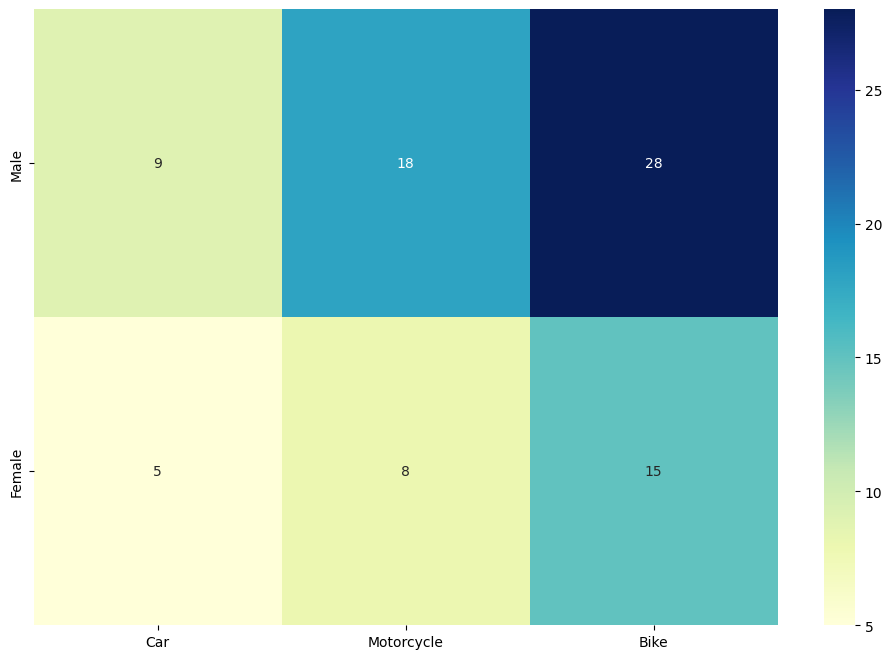

In [5]:
#plot da tabela com cores
table = [[9,18,28],
         [5, 8, 15]]

plt.figure(figsize=(12,8))
x_axis_labels = ['Car', 'Motorcycle', 'Bike']
y_axis_labels = ['Male', 'Female']

sns.heatmap(table, annot=True, cmap="YlGnBu", xticklabels=x_axis_labels, yticklabels=y_axis_labels)

##### 2. Formulando as hipóteses

H0: As variáveis não tem grau de associação

HA: As variáveis possuem grau de associação

Nível de significância, alpha = 0.05 (5%)

##### 3. Rodando o teste

In [13]:
#o teste será rodado utilizando a funçã chi2_contingency do pacote SciPy
from scipy.stats import chi2_contingency
from scipy.stats import chi2

estatistica, pvalor, df, expected = chi2_contingency(table)

alpha = 0.05

print(p)

if pvalor(p) <= alpha:
    print ('Dependentes (rejeita H0)')
else:
    print ('Independentes (não rejeita H0)')

NameError: name 'p' is not defined

#### Teste Anova

O teste ANOVA verifica se a média de diferentes grupos é diferente ou não. Sendo assim, será realizado para a média de idade de diferentes regiões de clientes de determinada rede de farmácias

In [8]:
#Gerando os dados
import scipy.stats as stats

np.random.seed(12)

regioes = ['sul', 'sudeste', 'centro_oeste', 'norte', 'nordeste']

#gerando dados aleatórios com python
consum_reg = np.random.choice(a =regioes,
                              p = [0.05, 0.15, 0.25, 0.05, 0.5], 
                              size = 1000)

consum_idade = stats.poisson.rvs(loc=18,
                                 mu=30,
                                 size=1000)

In [9]:
#agrupando os dados por região
consum_frame = pd.DataFrame({'reg':consum_reg, 'idade':consum_idade})
groupos = consum_frame.groupby('reg').groups

#extraindo a idade de cada um dos grupos
sul = consum_idade[groupos['sul']]
sudeste = consum_idade[groupos['sudeste']]
centro_oeste = consum_idade[groupos['centro_oeste']]
norte = consum_idade[groupos['norte']]
nordeste = consum_idade[groupos['nordeste']]

#Perform the ANOVA
stats.f_oneway(sul, sudeste, centro_oeste, norte, nordeste)

F_onewayResult(statistic=1.7744689357329695, pvalue=0.13173183201930463)

In [10]:
consum_frame

,reg,idade
0,sudeste,51
1,nordeste,49
2,centro_oeste,51
3,nordeste,48
4,sul,56
...,...,...
995,nordeste,47
996,sul,40
997,nordeste,50
998,nordeste,51


Como a hipótese nula do teste é de que não há diferença entre os grupos, como o p-valor é maior que 0.05, não se pode rejeitar H0, além de que nao há diferença entre os grupos estaticamente diferentes

#### Teste KS

Teste não paramétrico que verifica o quão distante está distribuição da distribuição de referência 

/tmp/ipykernel_2270/729812476.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rvs).set_title('Exemplo: Distribuição Normal')


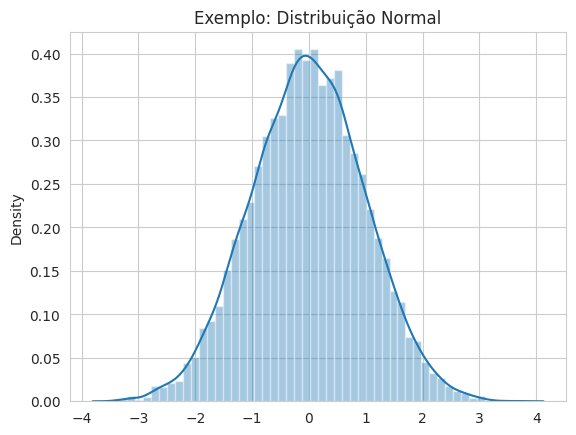

In [16]:
#Gera 10000 pontos da distribuição normal
rvs = stats.norm.rvs(size=10000)
sns.set_style('whitegrid')

#sns.kdeplot(rvs)
sns.distplot(rvs).set_title('Exemplo: Distribuição Normal')
plt.show()

Rodando o teste KS para comparar os dados gerados com uma distribuição normal com o teste KS

In [18]:
stats.kstest(rvs=rvs, cdf='norm')

KstestResult(statistic=0.007897733869343282, pvalue=0.5581410113606293, statistic_location=-0.6944428452511795, statistic_sign=1)

A hipótese nula do teste é de que a distribuição dos dados segue a mesma da distribuição de referência

Como o valor é maior que 0.05, temos para um nível de significância de 5%, o que não permite a rejeição da hipótese nula

##### Rodando o teste para a variável idade gerada com a distribuição de poisson no teste anterior

/tmp/ipykernel_2270/3110363257.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(consum_idade).set_title('Exemplo: Distribuição Idade usando Poisson')


Text(0.5, 1.0, 'Exemplo: Distribuição Idade usando Poisson')

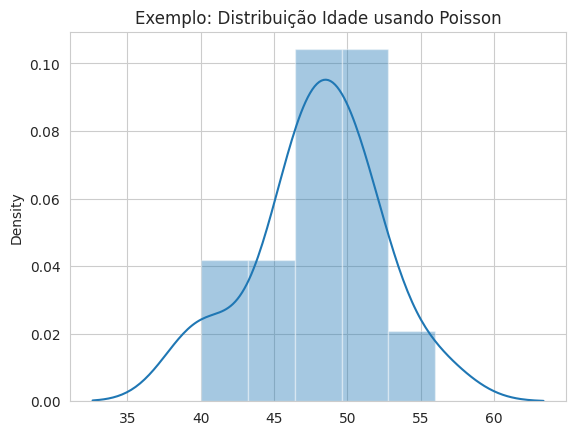

In [19]:
consum_idade = stats.poisson.rvs(loc=18,
                                 mu = 30,
                                 size = 15)

sns.distplot(consum_idade).set_title('Exemplo: Distribuição Idade usando Poisson')

In [20]:
#roda o teste ks
stats.kstest(rvs=consum_idade, cdf='norm')

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=40, statistic_sign=-1)

Hipótese nula do teste é de que a distribuição dos dados segue a mesma da distribuição de referência

Sendo assim, como o pvalor é menor que 0.05, temos para um nível de significância de 5%, se rejeita a hipótese nula e o dado não segue a distribuição normal pelo teste

#### QQ Plots

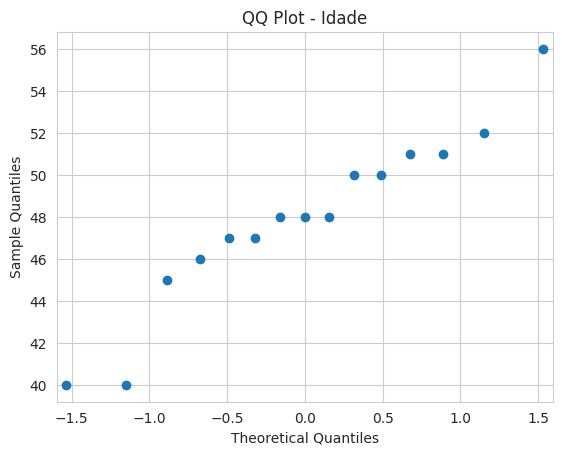

In [21]:
import statsmodels.api as sm

sm.qqplot(consum_idade)
plt.title('QQ Plot - Idade')
plt.show()

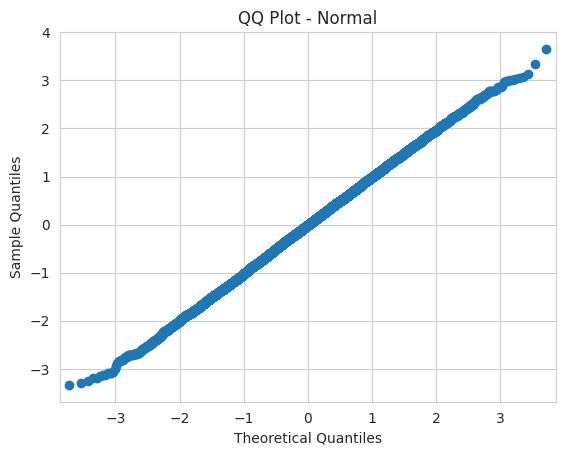

In [22]:
sm.qqplot(rvs)
plt.title("QQ Plot - Normal")
plt.show()